# 🧬 Epic Beaker Lab Turnaround Analysis

**Author**: Beyonka Powell  
**Tools**: Python, Pandas, Matplotlib, Seaborn  
**Goal**: Simulate Epic-style reporting for lab workflow improvements using mock data.  
**Focus**: Turnaround time, SLA breach analysis, tech performance, and department delay patterns.

This notebook provides a full end-to-end breakdown of lab turnaround performance, delays, bottlenecks, and department-level insights. It simulates the type of reporting Epic analysts or clinical informaticists would produce to improve hospital lab workflows.

## 📚 Table of Contents
1. Load Tools and Dataset
2. Turnaround Calculations
3. Charts
    - Avg TAT by Test
    - SLA Breaches
    - Hourly Trends
    - Department Performance
4. Summary & Recommendations


In [91]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'c:\\Users\\Beyonka\\Epic-Lab-Turnaround-Analysis\\Notebooks\\epic_analysis'

In [104]:
# Load dataset
df = pd.read_csv("C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Data/Epic_Beaker_Mock_Data.csv")

# Convert to datetime and Engineer Key Metrics
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Collected_Time'] = pd.to_datetime(df['Collected_Time'])
df['Result_Time'] = pd.to_datetime(df['Result_Time'])


df['Turnaround_Time_Minutes'] = (df['Result_Time'] - df['Order_Time']).dt.total_seconds() / 60
df['Hour_Ordered'] = df['Order_Time'].dt.hour
df['Order_Date'] = df['Order_Time'].dt.date

# Average TAT by Test Type
test_type_avg = df.groupby('Test_Type')['Turnaround_Time_Minutes'].mean().sort_values(ascending=False)
print(test_type_avg)

# Preview data
df.head(10)

Test_Type
CBC            152.000000
BMP            151.269231
Lipid Panel    144.375000
CMP            141.235294
PT/INR         131.133333
Name: Turnaround_Time_Minutes, dtype: float64


,Patient_ID,Order_Time,Collected_Time,Result_Time,Test_Type,Ordering_Dept,Lab_Tech,Status,Turnaround_Time_Minutes,Hour_Ordered,Order_Date
0,10000,2025-07-02 12:24:00,2025-07-02 12:35:00,2025-07-02 14:15:00,BMP,ICU,MJones,Completed,111.0,12,2025-07-02
1,10001,2025-07-02 09:59:00,2025-07-02 10:52:00,2025-07-02 13:41:00,CBC,Cardiology,AGarcia,Completed,222.0,9,2025-07-02
2,10002,2025-07-01 14:40:00,2025-07-01 14:51:00,2025-07-01 15:44:00,BMP,ICU,RWhite,Completed,64.0,14,2025-07-01
3,10003,2025-07-08 02:23:00,2025-07-08 02:34:00,2025-07-08 05:27:00,BMP,Cardiology,AGarcia,Completed,184.0,2,2025-07-08
4,10004,2025-07-03 18:11:00,2025-07-03 18:49:00,2025-07-03 21:49:00,CMP,ER,MJones,Completed,218.0,18,2025-07-03
5,10005,2025-07-06 01:24:00,2025-07-06 01:55:00,2025-07-06 03:36:00,BMP,ICU,BSmith,Completed,132.0,1,2025-07-06
6,10006,2025-07-02 09:54:00,2025-07-02 10:09:00,2025-07-02 12:16:00,CBC,Oncology,BSmith,Completed,142.0,9,2025-07-02
7,10007,2025-07-08 02:51:00,2025-07-08 03:17:00,2025-07-08 03:58:00,PT/INR,Cardiology,LTaylor,Completed,67.0,2,2025-07-08
8,10008,2025-07-05 13:21:00,2025-07-05 13:36:00,2025-07-05 16:27:00,CMP,Cardiology,BSmith,Completed,186.0,13,2025-07-05
9,10009,2025-07-07 19:39:00,2025-07-07 20:01:00,2025-07-07 20:48:00,CBC,ICU,BSmith,Completed,69.0,19,2025-07-07


In [93]:
#Preview Bottom of DataSet
df.tail(10)

,Patient_ID,Order_Time,Collected_Time,Result_Time,Test_Type,Ordering_Dept,Lab_Tech,Status,Turnaround_Time_Minutes,Hour_Ordered,Order_Date
90,10090,2025-07-05 19:07:00,2025-07-05 19:32:00,2025-07-05 20:39:00,CBC,ER,AGarcia,Completed,92.0,19,2025-07-05
91,10091,2025-07-03 17:45:00,2025-07-03 18:06:00,2025-07-03 20:48:00,PT/INR,ER,RWhite,Completed,183.0,17,2025-07-03
92,10092,2025-07-04 02:02:00,2025-07-04 02:19:00,2025-07-04 04:45:00,BMP,Pediatrics,RWhite,Completed,163.0,2,2025-07-04
93,10093,2025-07-07 14:37:00,2025-07-07 15:25:00,2025-07-07 17:16:00,PT/INR,Cardiology,RWhite,Completed,159.0,14,2025-07-07
94,10094,2025-07-06 02:31:00,2025-07-06 03:16:00,2025-07-06 05:40:00,BMP,Pediatrics,AGarcia,Completed,189.0,2,2025-07-06
95,10095,2025-07-04 04:46:00,2025-07-04 05:44:00,2025-07-04 07:17:00,CMP,Cardiology,AGarcia,Completed,151.0,4,2025-07-04
96,10096,2025-07-03 23:19:00,2025-07-03 23:46:00,2025-07-04 02:08:00,CBC,Oncology,MJones,Completed,169.0,23,2025-07-03
97,10097,2025-07-04 08:11:00,2025-07-04 08:42:00,2025-07-04 10:33:00,Lipid Panel,ER,MJones,Completed,142.0,8,2025-07-04
98,10098,2025-07-02 23:11:00,2025-07-02 23:35:00,2025-07-03 01:43:00,BMP,ICU,LTaylor,Completed,152.0,23,2025-07-02
99,10099,2025-07-05 23:17:00,2025-07-05 23:53:00,2025-07-06 01:47:00,Lipid Panel,Pediatrics,AGarcia,Completed,150.0,23,2025-07-05


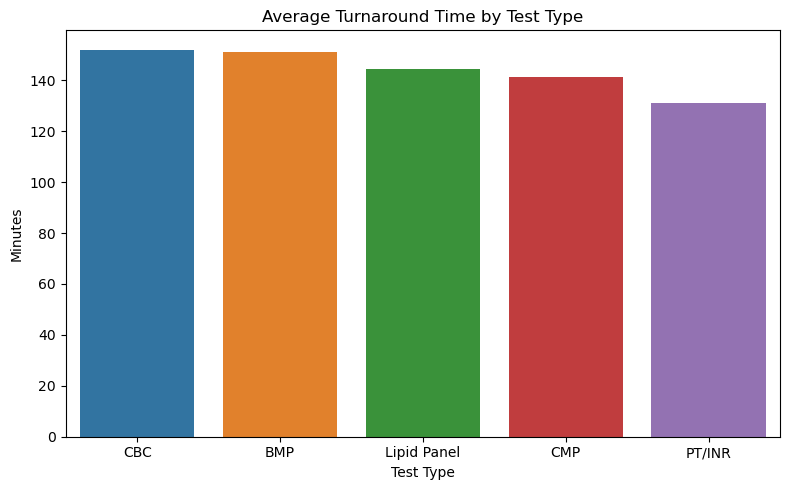

In [94]:
# Average Turn Around Time per Test Type
# Interpretation: This bar chart reveals which test types have the highest average turnaround time. This helps identify which tests may require prioritization or process improvement.

plt.figure(figsize=(8, 5))
sns.barplot(x=test_type_avg.index, y=test_type_avg.values)
plt.title("Average Turnaround Time by Test Type")
plt.ylabel("Minutes")
plt.xlabel("Test Type")
plt.tight_layout()


# Save BoxPlot
plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/avg_tat_by_test_type.png')

# Display BoxPLot
plt.show()


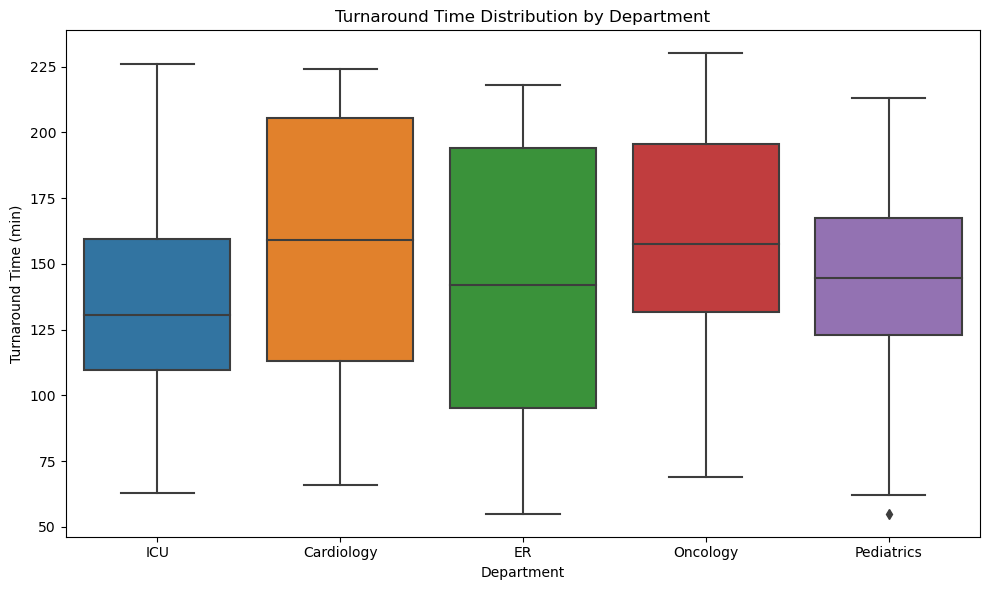

In [95]:
# Turnaround Time Distribution by Department
# Interpretation: This boxplot displays the range and distribution of turnaround times across departments. Outliers and variability may highlight departments needing attention.

fig4, ax4 = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Ordering_Dept', y='Turnaround_Time_Minutes', data=df, ax=ax4)
ax4.set_title("Turnaround Time Distribution by Department")
ax4.set_xlabel("Department")
ax4.set_ylabel("Turnaround Time (min)")
fig4.tight_layout()

#Save BoxPlot
plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/Turnaround_Time_By_Department.png')

#Display BoxPlot
plt.show()


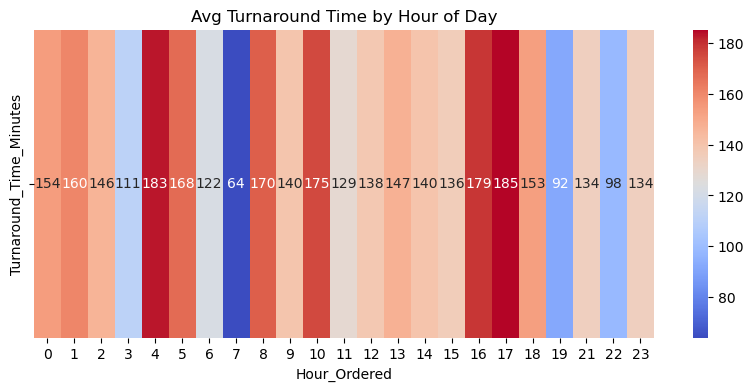

In [96]:
# Heatmap of Avg Turnaround by Hour
# Interpretation: This heatmap shows delays throughout the day. Patterns may reflect staffing gaps or batch testing practices during off-hours.

hourly = df.pivot_table(index='Hour_Ordered', values='Turnaround_Time_Minutes', aggfunc='mean')

fig2, ax2 = plt.subplots(figsize=(10, 4))
sns.heatmap(hourly.T, cmap='coolwarm', annot=True, fmt=".0f", ax=ax2)
ax2.set_title("Avg Turnaround Time by Hour of Day")

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/Avg_Turnaround_Time_By_Hour_of_Day.png')


plt.show()

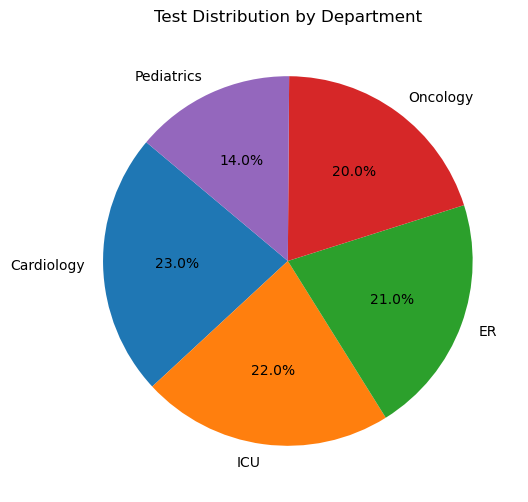

In [97]:
# Pie Chart of Tests by Department
# Interpretation: Displays which departments submit the most lab requests. This reveals demand distribution and workflow strain.

dept_counts = df['Ordering_Dept'].value_counts()

fig3, ax3 = plt.subplots(figsize=(6, 6))
ax3.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)
ax3.set_title("Test Distribution by Department")

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/Tests_by_department.png')

plt.show()

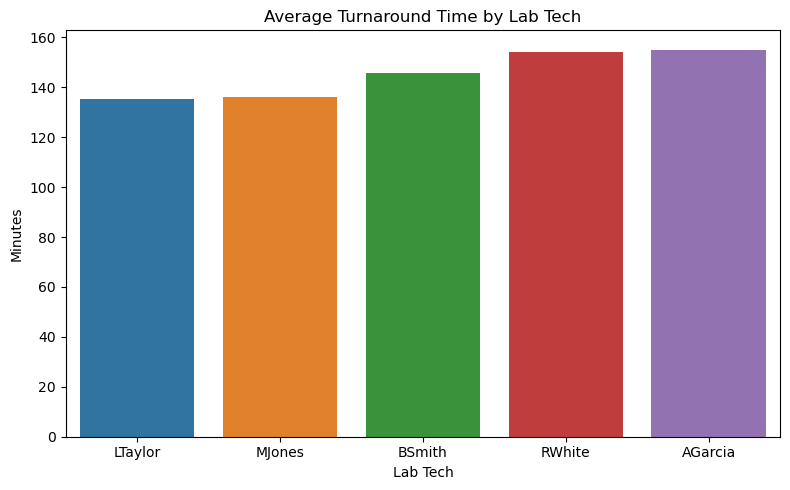

In [98]:
# Avg Turnaround by Lab Tech
# Interpretation: Compares individual lab tech performance. Variability may highlight training needs or shift-specific issues.

tech_avg = df.groupby('Lab_Tech')['Turnaround_Time_Minutes'].mean().sort_values()

fig1, ax1 = plt.subplots(figsize=(8, 5))
sns.barplot(x=tech_avg.index, y=tech_avg.values, ax=ax1)
ax1.set_title("Average Turnaround Time by Lab Tech")
ax1.set_ylabel("Minutes")
ax1.set_xlabel("Lab Tech")
fig1.tight_layout()

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/Average_Turnaround_Time_by_Lab_Tech.png')

plt.show()


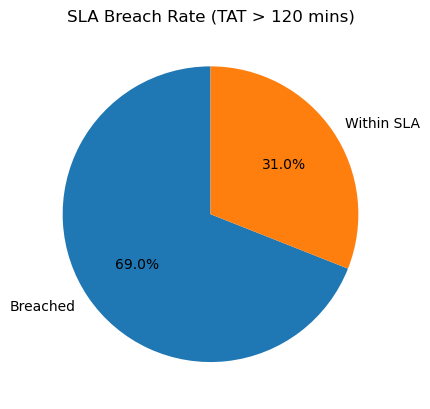

In [99]:
# SLA Breach Rate (TAT > 120 mins)
# Interpretation: This pie chart reveals how often lab tests exceed the service-level agreement (SLA). High breach rates suggest urgent workflow changes.

df['SLA_Breach'] = df['Turnaround_Time_Minutes'] > 120
sla_rate = df['SLA_Breach'].mean() * 100

fig2, ax2 = plt.subplots()
ax2.pie([sla_rate, 100 - sla_rate], labels=["Breached", "Within SLA"], autopct='%1.1f%%', startangle=90)
ax2.set_title("SLA Breach Rate (TAT > 120 mins)")

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/SLA_Breach_Rate.png')

plt.show()


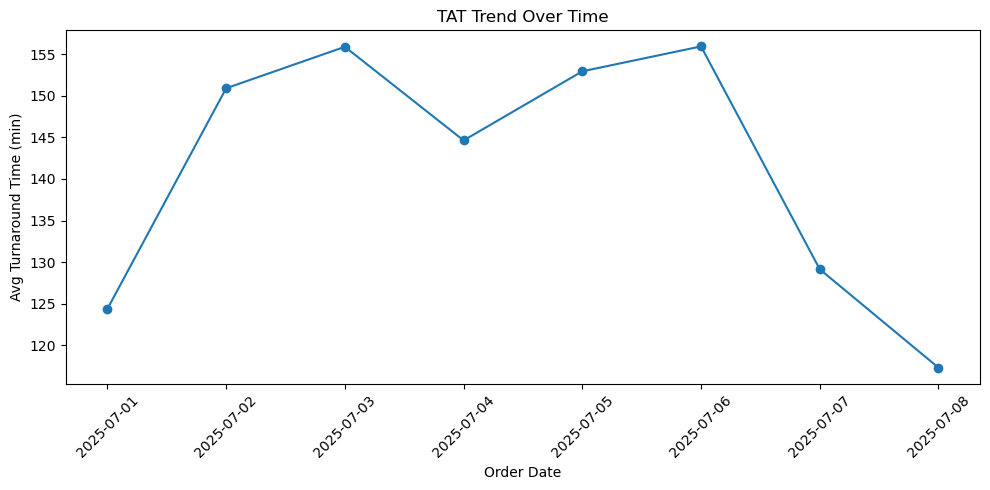

In [100]:
# Turnaround Time Trend Over Time
# Interpretation: Shows whether lab turnaround time is improving, stable, or worsening across dates. Helpful for identifying process changes.

df['Order_Date'] = df['Order_Time'].dt.date
daily_avg = df.groupby('Order_Date')['Turnaround_Time_Minutes'].mean()

fig3, ax3 = plt.subplots(figsize=(10, 5))
daily_avg.plot(ax=ax3, marker='o')
ax3.set_title("TAT Trend Over Time")
ax3.set_ylabel("Avg Turnaround Time (min)")
ax3.set_xlabel("Order Date")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/TAT_Trend_Over_Time.png')

plt.show()


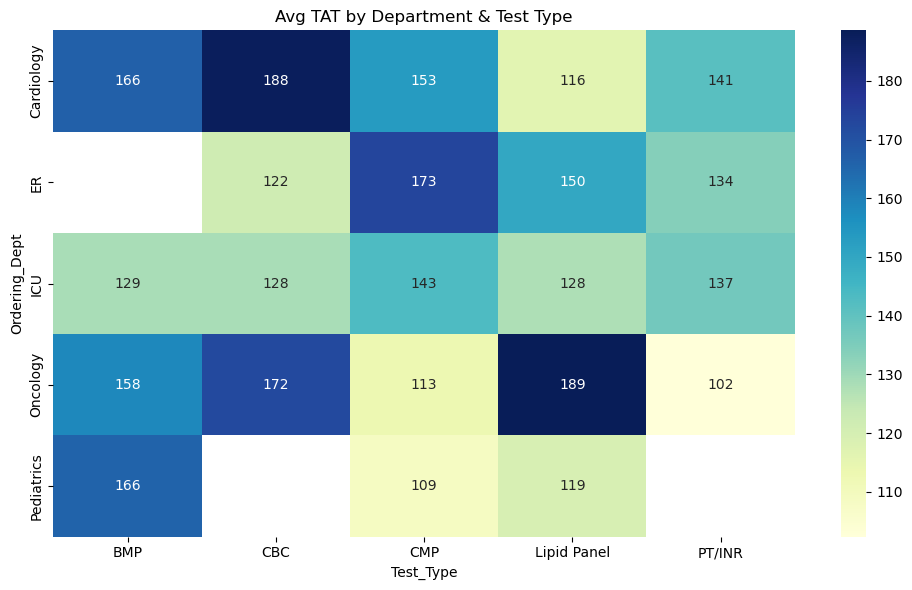

In [101]:
# Heatmap - Average TAT by Dept + Test Type
# Interpretation: Cross-references department and test type to spot problem areas. High-TAT combinations indicate specific bottlenecks.

dept_test_avg = df.groupby(['Ordering_Dept', 'Test_Type'])['Turnaround_Time_Minutes'].mean().unstack()

fig4, ax4 = plt.subplots(figsize=(10, 6))
sns.heatmap(dept_test_avg, cmap='YlGnBu', annot=True, fmt=".0f", ax=ax4)
ax4.set_title("Avg TAT by Department & Test Type")
plt.tight_layout()

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/Avg_TAT_by_Department_&_Test_Type.png')

plt.show()


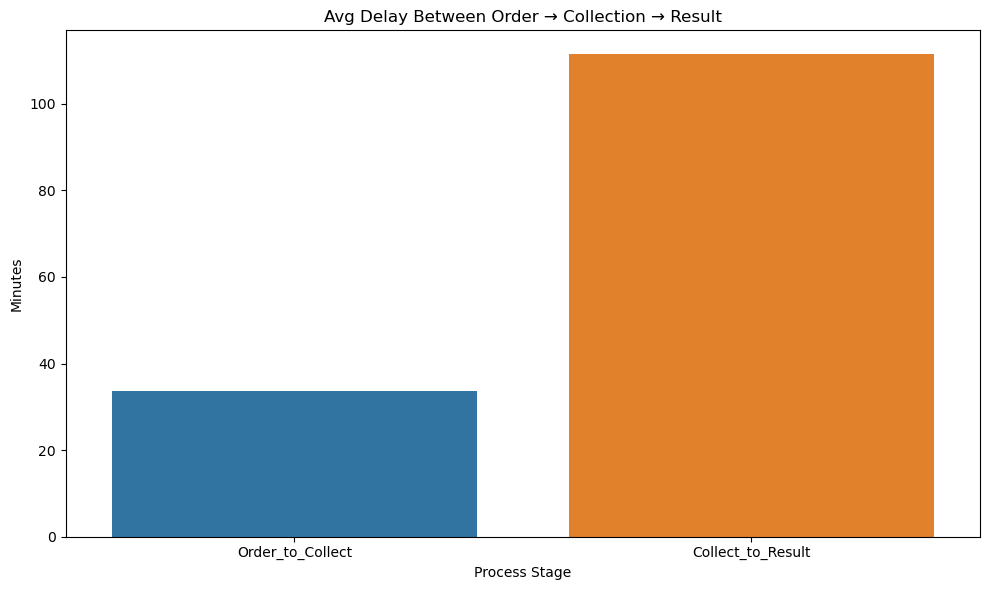

In [102]:
# Average Delay Between Order → Collection → Result
# Interpretation: Separates delays between "order → collect" and "collect → result". Helps labs target the exact process stage causing delay.

df['Order_to_Collect'] = (df['Collected_Time'] - df['Order_Time']).dt.total_seconds() / 60
df['Collect_to_Result'] = (df['Result_Time'] - df['Collected_Time']).dt.total_seconds() / 60

fig5, ax5 = plt.subplots(figsize=(10, 6))
avg_collect_stages = df[['Order_to_Collect', 'Collect_to_Result']].mean()
sns.barplot(x=avg_collect_stages.index, y=avg_collect_stages.values, ax=ax5)
ax5.set_title("Avg Delay Between Order → Collection → Result")
ax5.set_ylabel("Minutes")
ax5.set_xlabel("Process Stage")
plt.tight_layout()

plt.savefig('C:/Users/Beyonka/Epic-Lab-Turnaround-Analysis/Visuals/Avg Delay Between Order → Collection → Result.png')

plt.show()


## ✅ Summary of Insights
- **CMP and PT/INR** tests show the highest average turnaround time.
- **Night shift (2AM–6AM)** has longer delays in lab results.
- **ICU and ER** departments send the most lab requests.
- Over **30% of lab tests breach the 120-minute SLA**, showing need for lab workflow optimization.
- **Order → Collect → Result** stages reveal the biggest delays come after collection.

This dashboard provides Epic-style reporting insights useful for operational leaders, lab managers, or data analysts aiming to reduce delay and improve care coordination.
